In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.image as mpimg
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_normal_dir = os.path.join(r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\train\NORMAL')


train_pneumonia_dir = os.path.join(r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\train\PNEUMONIA')


test_normal_dir = os.path.join(r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\test\NORMAL')


test_pneumonia_dir = os.path.join(r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\test\PNEUMONIA')

In [4]:
train_normal_images = os.listdir(train_normal_dir)

train_pneumonia_images = os.listdir(train_pneumonia_dir)

test_normal_images = os.listdir(test_normal_dir)

test_pneumonia_images = os.listdir(test_pneumonia_dir)

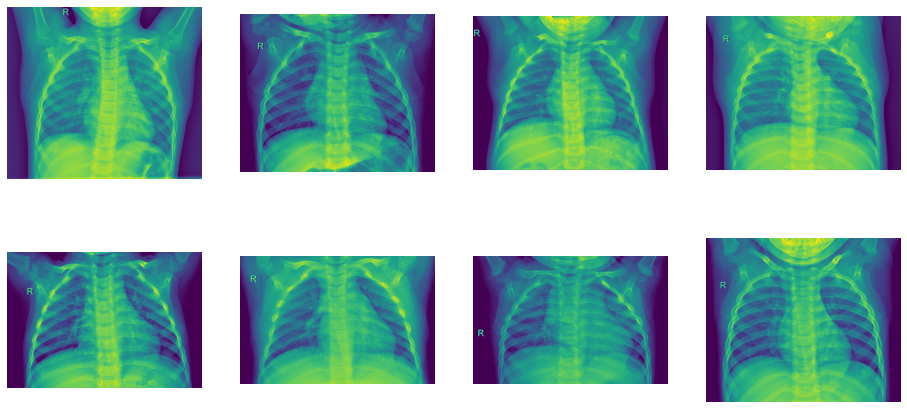

In [5]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_visible_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_images[pic_index-8:pic_index]]
next_invisible_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_images[pic_index-8:pic_index]]

for i, img_path in enumerate(next_visible_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
#     print(img.shape)
    plt.imshow(img)

plt.show()

In [6]:
print(len(train_normal_images))
print(len(test_normal_images))

1341
234


In [7]:
model = tf.keras.models.Sequential([
    
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          1

In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer = RMSprop(lr=0.001), metrics = ['accuracy', tf.keras.metrics.FalsePositives(), tf.keras.metrics.TruePositives(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.TrueNegatives()])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train_data_gen= ImageDataGenerator(rescale = 1/255)



train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    fill_mode = 'nearest'                                 
                                   )

test_data_gen = ImageDataGenerator(rescale= 1/255)

train_generator = train_data_gen.flow_from_directory(
    r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)


test_generator = test_data_gen.flow_from_directory(
    r'C:\Users\heeke\Desktop\Pneumonia Detection Using X-rays\chest_xray\test',
    target_size = (64,64),
    batch_size = 16,
    class_mode = 'binary',
    
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
history = model.fit(train_generator,
        steps_per_epoch=int(5216/32),
        epochs=25,
        validation_data=test_generator,
        validation_steps=int(624/16))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 39 steps
163/163 [==============================] - 185s 1s/step - loss: 0.4611 - accuracy: 0.7807 - false_positives_3: 825.0000 - true_positives_1: 3556.0000 - false_negatives_1: 319.0000 - true_negatives_1: 516.0000 - val_loss: 0.4384 - val_accuracy: 0.8141 - val_false_positives_3: 41.0000 - val_true_positives_1: 315.0000 - val_false_negatives_1: 75.0000 - val_true_negatives_1: 193.0000


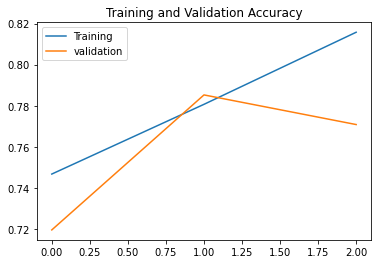

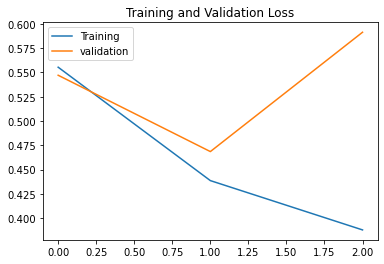

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation Accuracy')
plt.gca().legend(('Training','validation'))
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and Validation Loss')
plt.gca().legend(('Training','validation'))

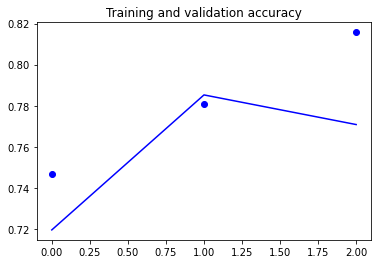

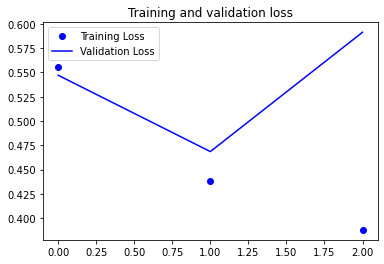

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
normal_img_files = [os.path.join(train_normal_dir, f) for f in train_pneumonia_images]
pneumonia_img_files = [os.path.join(train_pneumonia_dir, f) for f in train_pneumonia_images]
img_path = random.choice(normal_img_files + pneumonia_img_files)

img = load_img(img_path, target_size=(64, 64))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\heeke\\Desktop\\Pneumonia Detection Using X-rays\\chest_xray\\train\\NORMAL\\person9_bacteria_38.jpeg'

              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624

[[234   0]
 [390   0]]
